In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.cluster import KMeans
#from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing Data

In [2]:
df = pd.read_csv('nasa.csv')
df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [3]:
df['Hazardous']

0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

In [4]:
df["Hazardous"] = df["Hazardous"].astype(int)

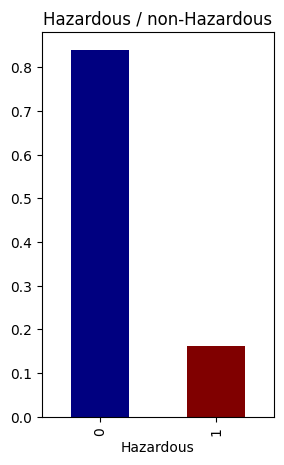

In [5]:
fig = plt.figure(figsize = (3,5))
df['Hazardous'].value_counts(normalize = True, ascending = False).plot(kind='bar', color=['navy', 'maroon'])
plt.title('Hazardous / non-Hazardous')
plt.show()

In [6]:
class_distribution_before = df['Hazardous'].value_counts()
print(class_distribution_before)

Hazardous
0    3932
1     755
Name: count, dtype: int64


# EDA

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4687, 40)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  30
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number o

Number of All Scatter Plots = 465
Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.
Could not draw Pair Scatter Plots


ValueError: Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x87200 with 435 Axes>

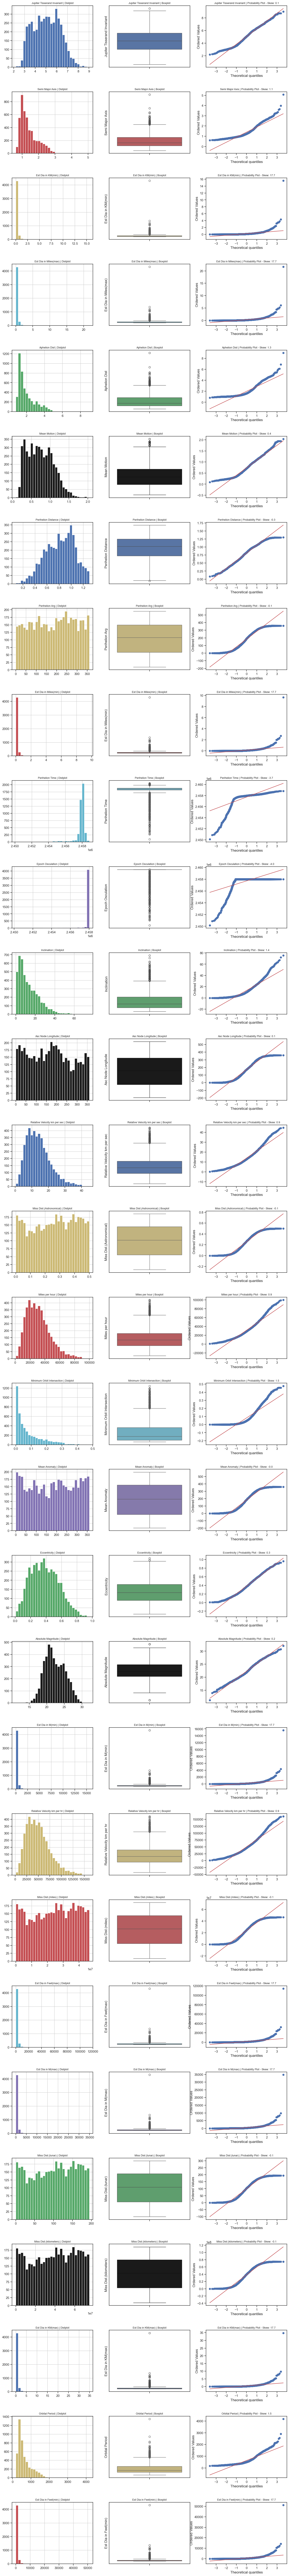

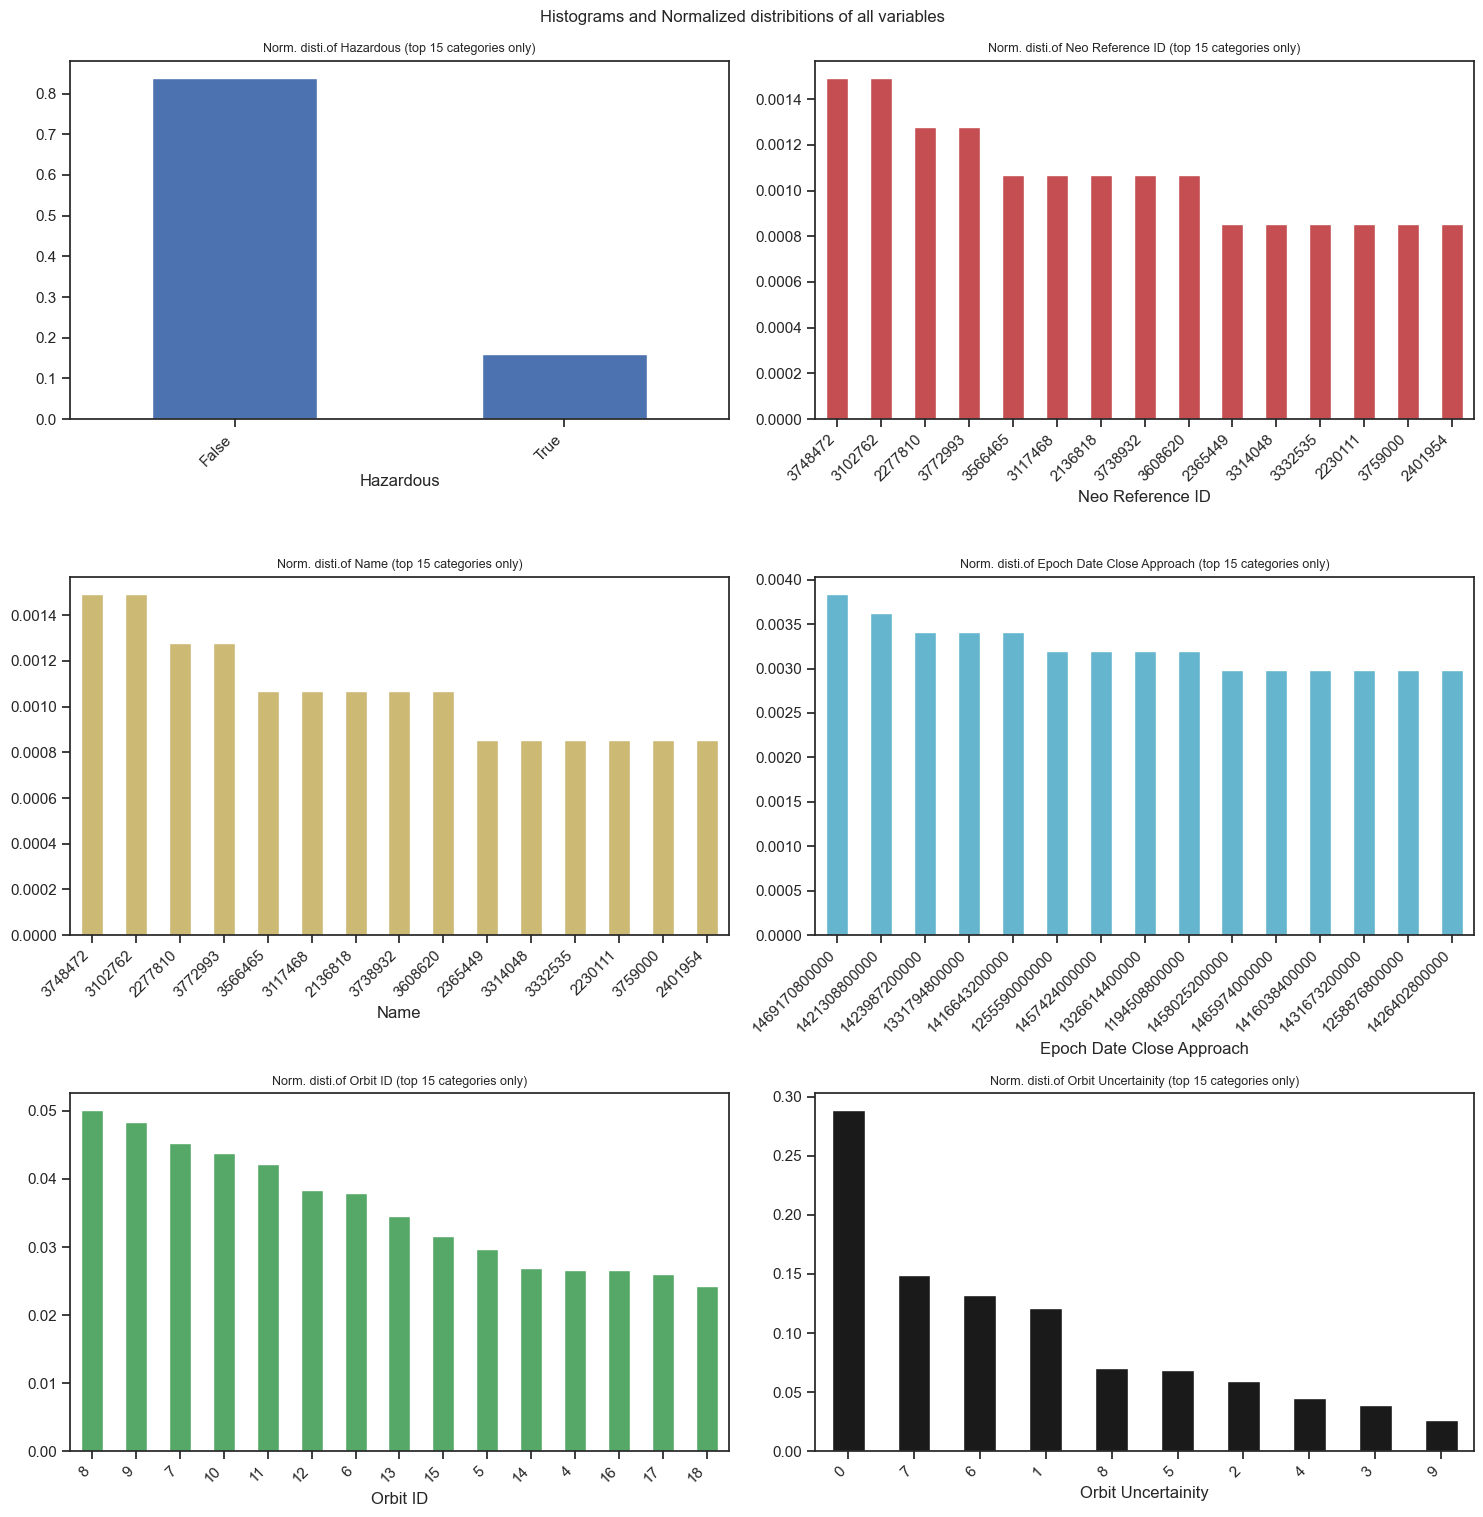

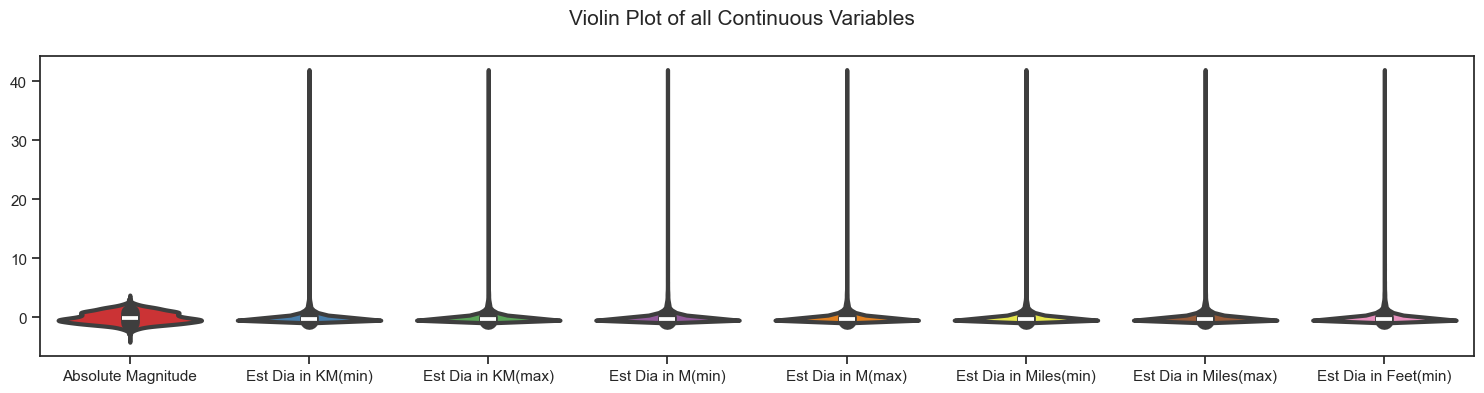

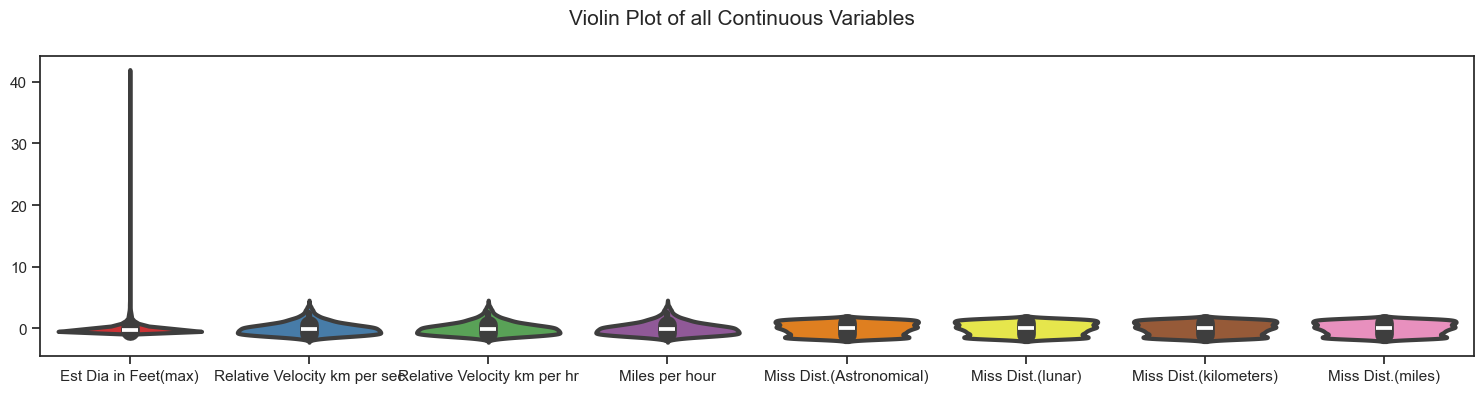

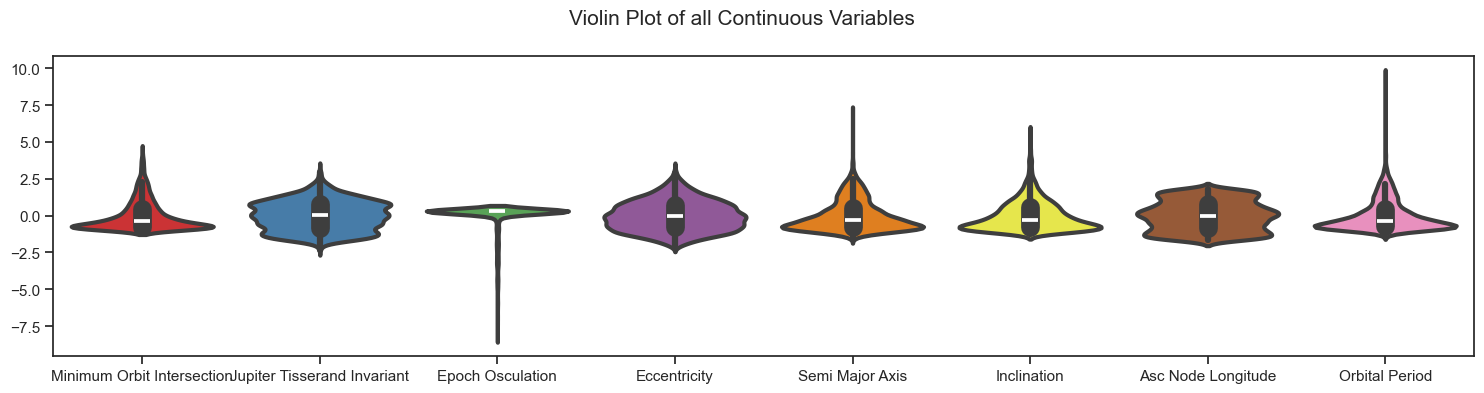

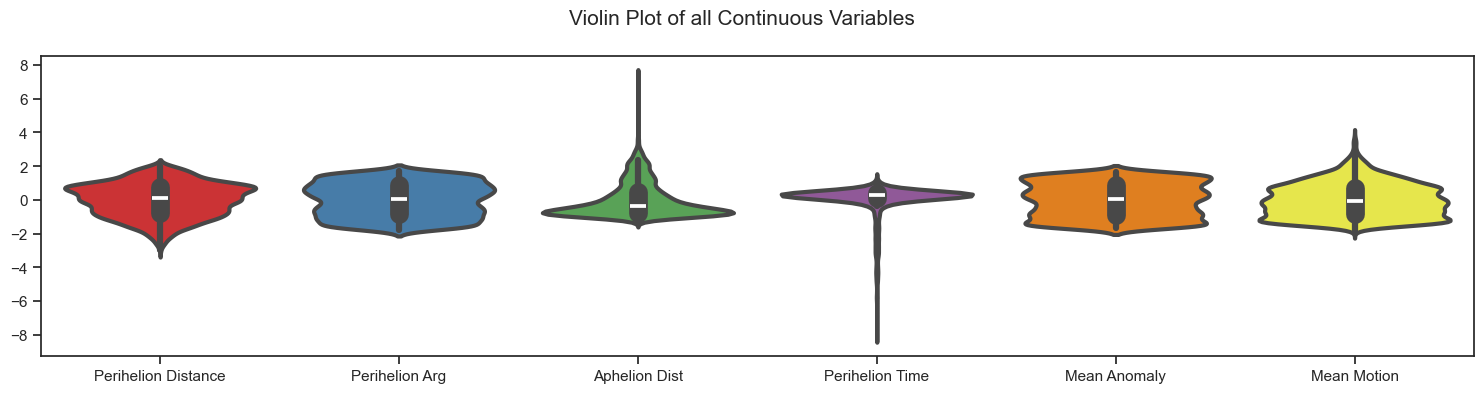

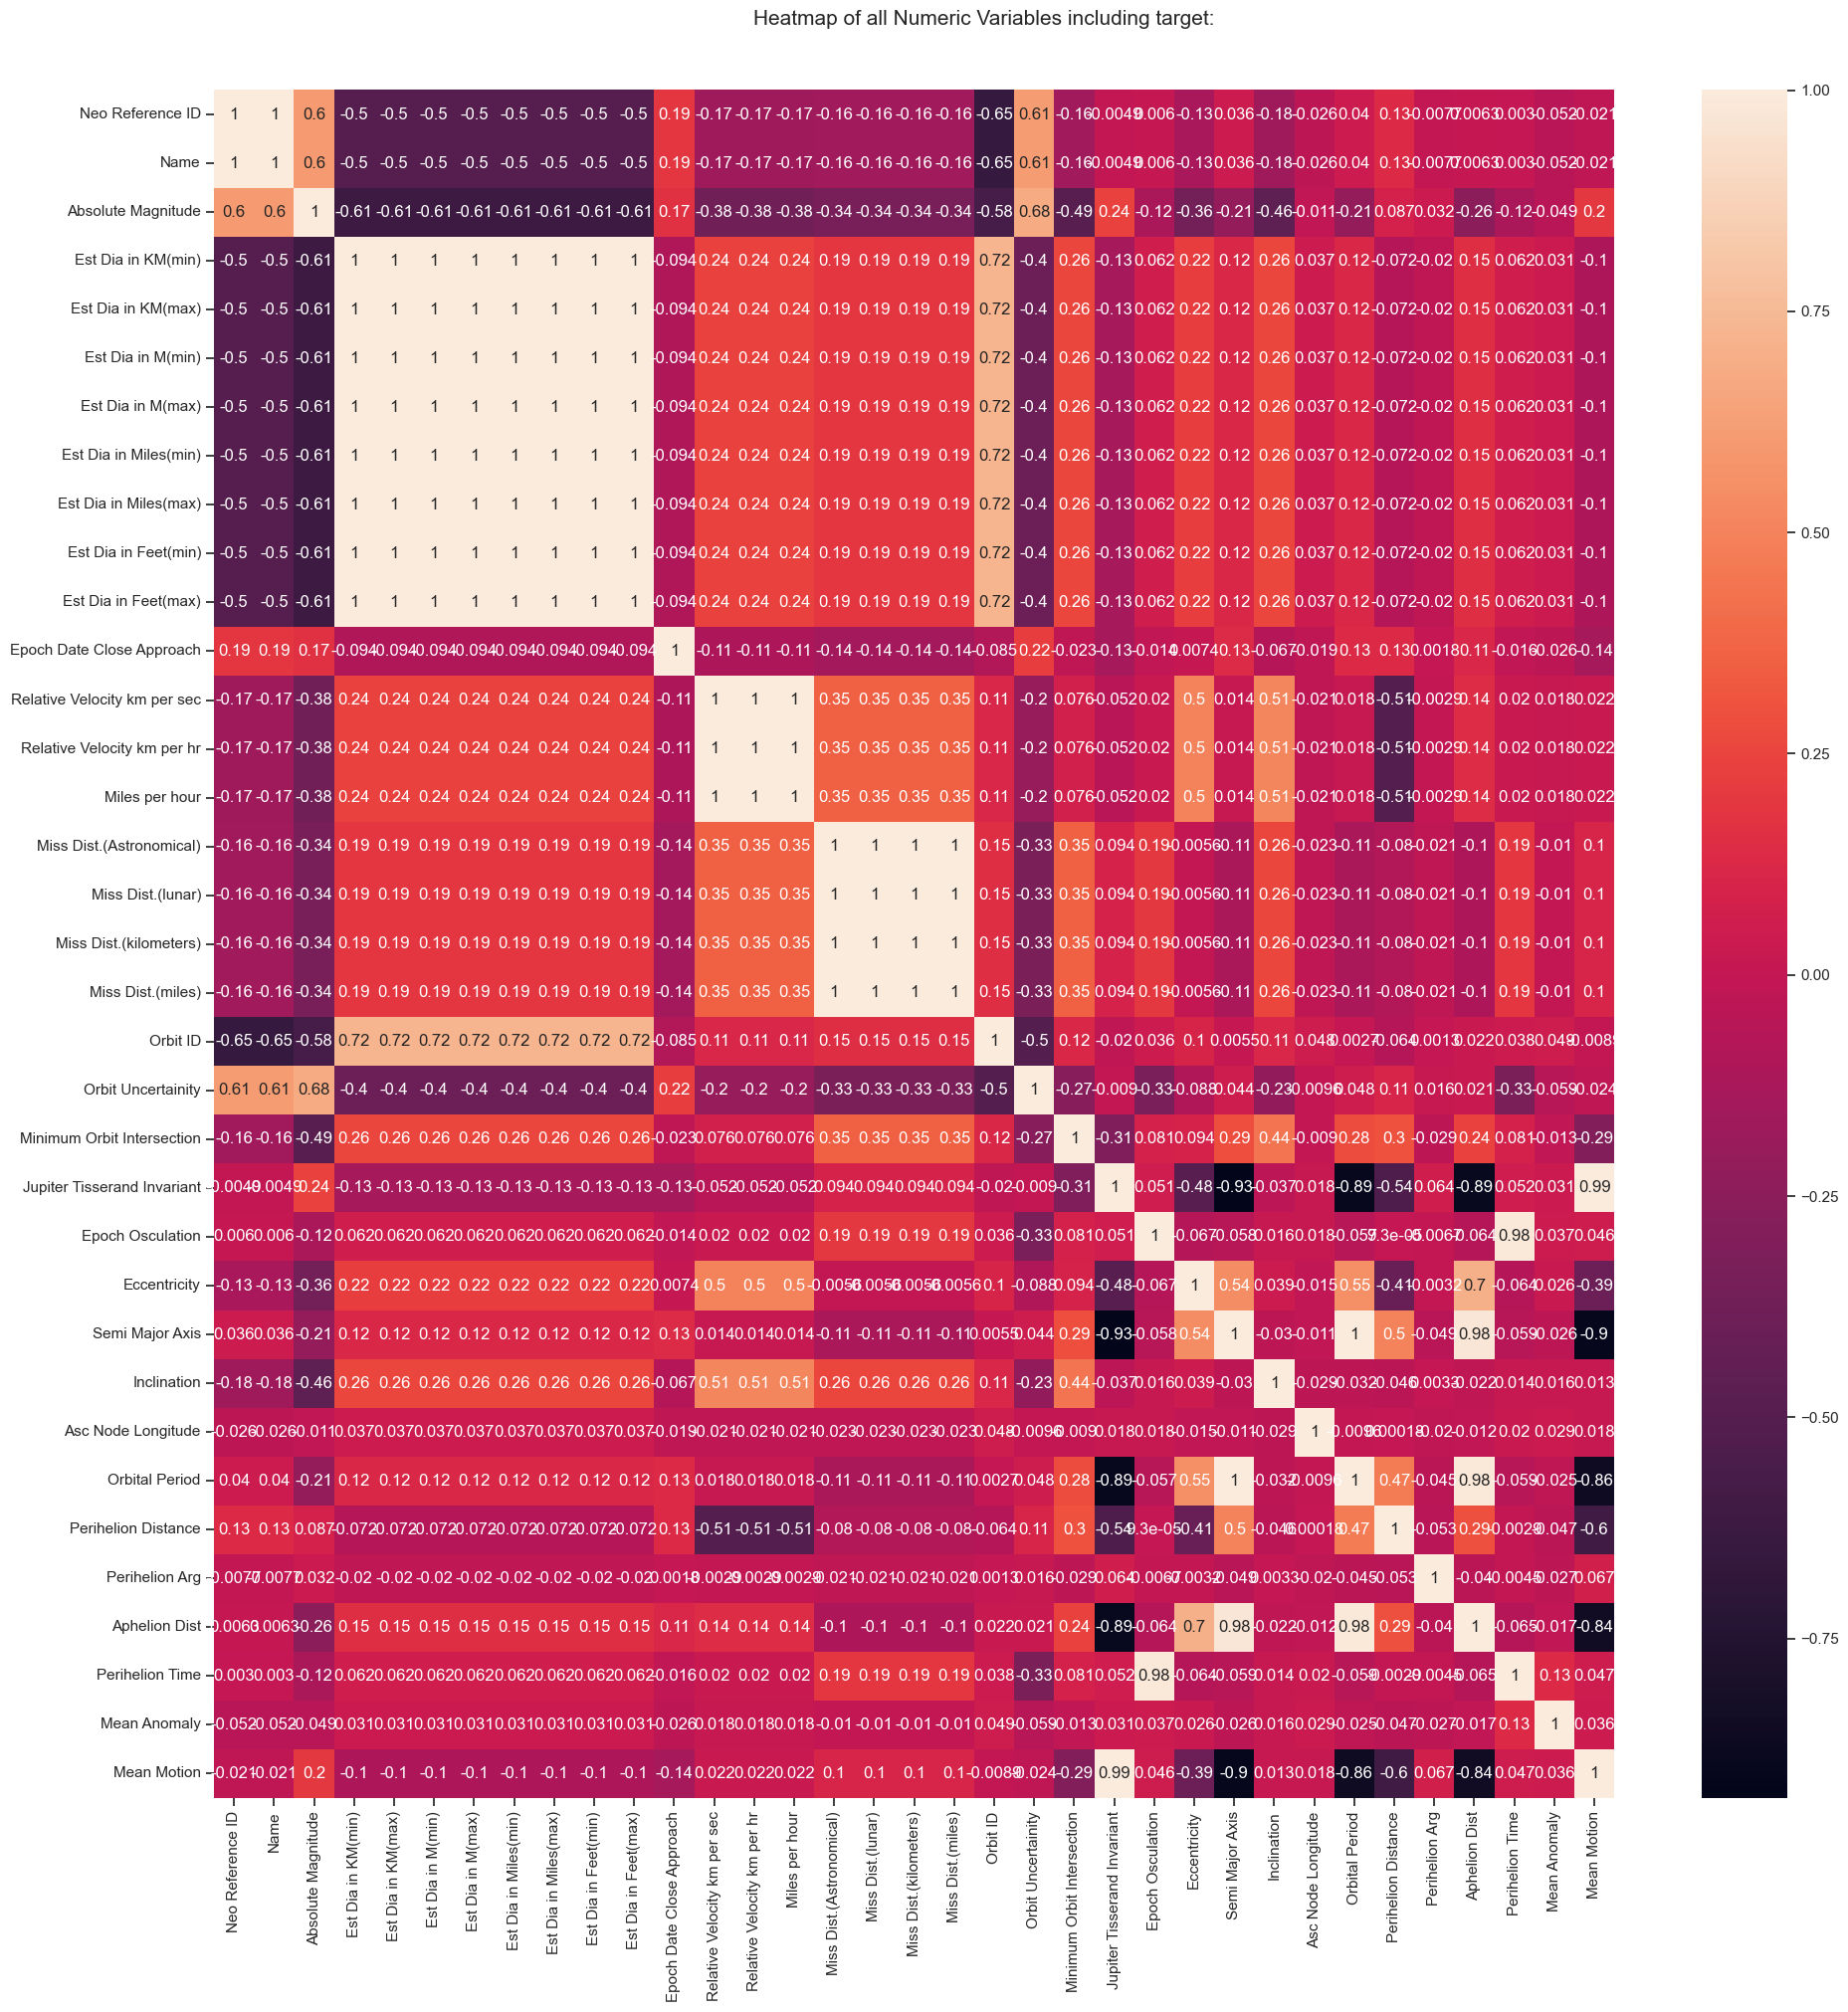

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

Could not draw wordcloud plot for Orbit Determination Date. We need at least 1 word to plot a word cloud, got 0.
Could not draw wordcloud plot for Close Approach Date. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 120 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


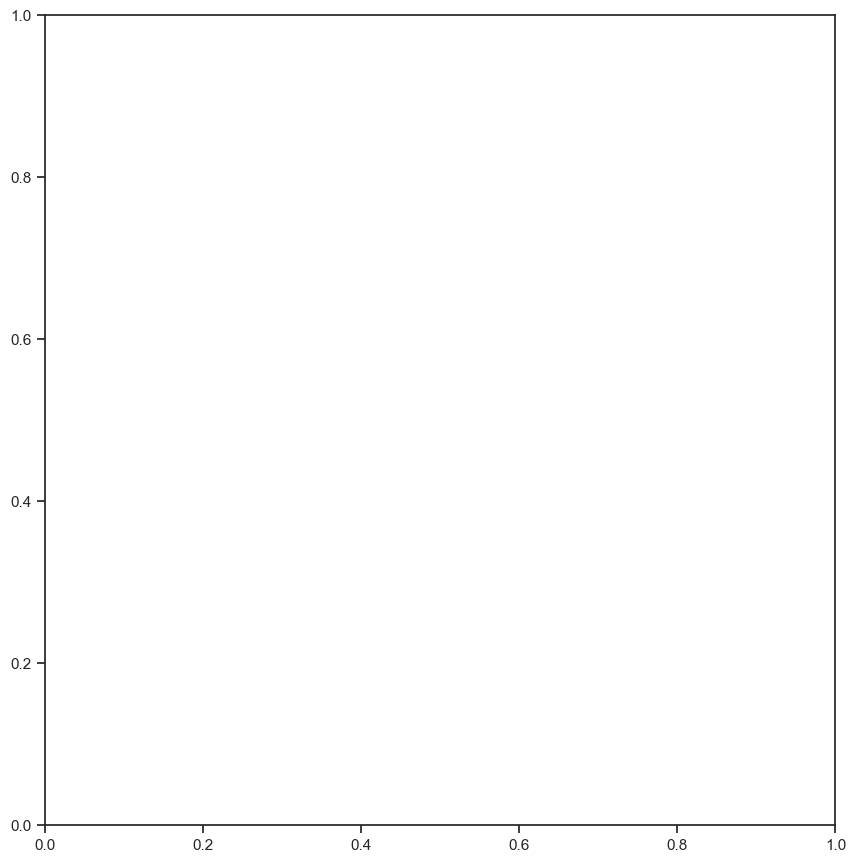

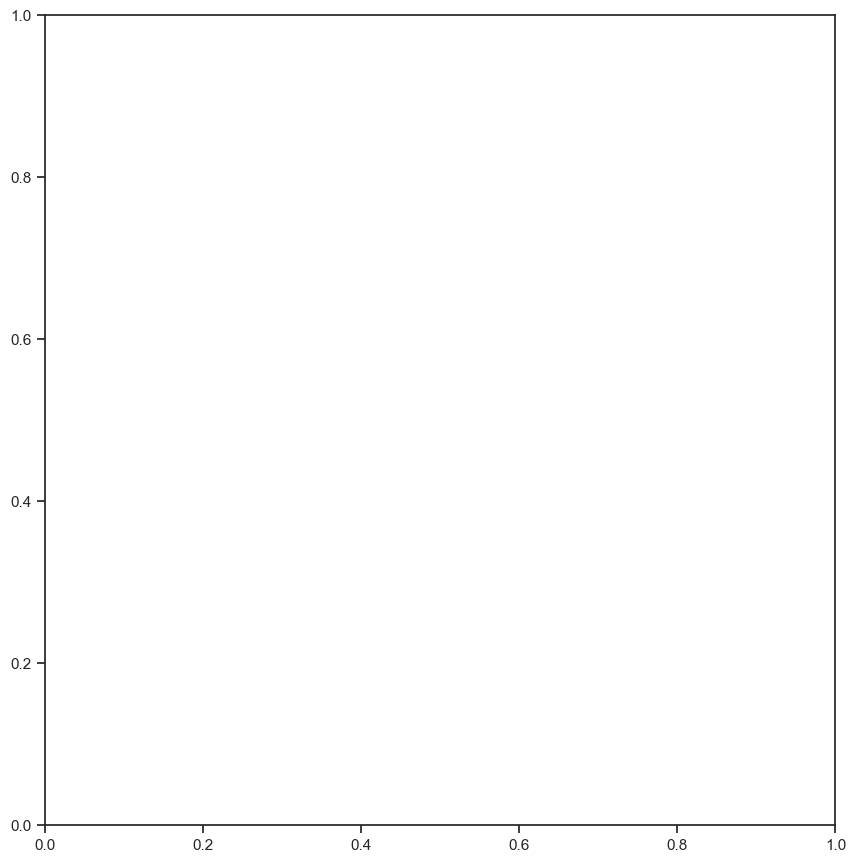

In [7]:
from autoviz.AutoViz_Class import AutoViz_Class


AV = AutoViz_Class()

import matplotlib.pyplot as plt
%matplotlib inline
filename = r"E:\Program Files (x86)\ML Project\Asteroid Classification - c\hazardous-asteroid-detection\nasa.csv"

dft = AV.AutoViz(
    filename,
    sep=','
)

# Data Preperation
Resolving class imbalance with oversampling technique

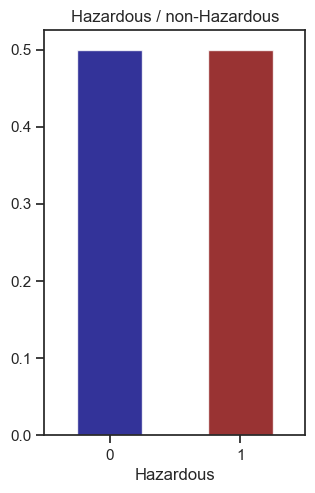

In [8]:
from sklearn.utils import resample

false = df[df['Hazardous'] == 0]
true = df[df.Hazardous == 1]
true_oversampled = resample(true, replace=True, n_samples=len(false), random_state=12345)
df_oversampled = pd.concat([false, true_oversampled])

fig = plt.figure(figsize = (3,5))
df_oversampled.Hazardous.value_counts(normalize = True, ascending = False).plot(kind='bar', color=['navy', 'maroon'], alpha = 0.8, rot=0)
plt.title('Hazardous / non-Hazardous')
plt.show()

In [9]:
class_distribution_after = df_oversampled['Hazardous'].value_counts()
print(class_distribution_after)

Hazardous
0    3932
1    3932
Name: count, dtype: int64


# Detecting Null Values

In [10]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7864 entries, 1 to 978
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Est Dia in M(min)             7864 non-null   float64
 6   Est Dia in M(max)             7864 non-null   float64
 7   Est Dia in Miles(min)         7864 non-null   float64
 8   Est Dia in Miles(max)         7864 non-null   float64
 9   Est Dia in Feet(min)          7864 non-null   float64
 10  Est Dia in Feet(max)          7864 non-null   float64
 11  Close Approach Date           7864 non-null   object 
 12  Epoch Date Close Approach     7864 non-null   int64  
 13  Relative 

# Encoding categorical features 

In [11]:
# Initialize the encoder
encoder = LabelEncoder()

# Encode 'Orbiting Body' and 'Equinox' columns
df['Orbiting Body'] = encoder.fit_transform(df['Orbiting Body'])
df['Equinox'] = encoder.fit_transform(df['Equinox'])

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Check uniqueness of the index
if not df_oversampled.index.is_unique:
    # Reset the index to ensure uniqueness
    df_oversampled = df_oversampled.reset_index(drop=True)

# Two types of 'object' dtypes
categorical_cols = ['Orbiting Body', 'Equinox']
date_cols = ['Close Approach Date', 'Orbit Determination Date']

# Convert date-type features to ordinal values
for col in date_cols:
    df_oversampled[col] = df_oversampled[col].apply(lambda x: int(pd.Timestamp(x).timestamp()))

# Encoding other categorical features
# Initialize the encoder
encoder = OneHotEncoder()
cat_encoded_np = encoder.fit_transform(df_oversampled[categorical_cols]).toarray() # Dense numpy array

# Create a DataFrame from the one-hot encoded array
cat_encoded_df = pd.DataFrame(cat_encoded_np)

# Assign column names to the DataFrame
cat_encoded_df.columns = encoder.get_feature_names_out(categorical_cols)

# Remove categorical columns from the dataset
df_cat_dropped = df_oversampled.drop(categorical_cols, axis=1)

# Concatenate the encoded categorical features and the rest of the dataset
encoded_df = pd.concat([df_cat_dropped, cat_encoded_df], axis=1)

# Print the resulting encoded DataFrame
print(encoded_df)


      Neo Reference ID   Name    Absolute Magnitude  Est Dia in KM(min)  \
0          3723955      3723955         21.3              0.146068        
1          3092506      3092506         27.4              0.008801        
2          3671135      3671135         19.6              0.319562        
3          2495323      2495323         19.6              0.319562        
4          2153315      2153315         19.2              0.384198        
...                ...      ...                 ...                 ...   
7859       2085236      2085236         18.6              0.506471        
7860       2380636      2380636         19.7              0.305179        
7861       3521439      3521439         21.4              0.139494        
7862       2232691      2232691         19.8              0.291444        
7863       3743119      3743119         19.3              0.366906        

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0          0.326618          146.

# Dimentionality Reduction

Dropping redundant data (in this case same data with different units)


1. 'Est Dia in KM(min)', 'Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
2. 'Est Dia in KM(max)', 'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)'
3. 'Relative Velocity km per sec', 'Relative Velocity km per hr'
4. 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'

Okay, now we can keep one from each line (1-4) and drop the others

In [13]:
df_dropped = encoded_df.drop(['Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
                       'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)',
                       'Relative Velocity km per hr',
                       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)'], axis=1)
# no change will take place in the original dataframe
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Est Dia in M(min)             7864 non-null   float64
 6   Est Dia in M(max)             7864 non-null   float64
 7   Est Dia in Miles(min)         7864 non-null   float64
 8   Est Dia in Miles(max)         7864 non-null   float64
 9   Est Dia in Feet(min)          7864 non-null   float64
 10  Est Dia in Feet(max)          7864 non-null   float64
 11  Close Approach Date           7864 non-null   int64  
 12  Epoch Date Close Approach     7864 non-null   int64  
 13  Rel

In [14]:
# 'df_dropped' is the new modified dataframe, 10 columns dropped
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Close Approach Date           7864 non-null   int64  
 6   Epoch Date Close Approach     7864 non-null   int64  
 7   Relative Velocity km per sec  7864 non-null   float64
 8   Miles per hour                7864 non-null   float64
 9   Miss Dist.(kilometers)        7864 non-null   float64
 10  Orbit ID                      7864 non-null   int64  
 11  Orbit Determination Date      7864 non-null   int64  
 12  Orbit Uncertainity            7864 non-null   int64  
 13  Min

# Removing Multicollinearity

Plotting Heatmap for correlations

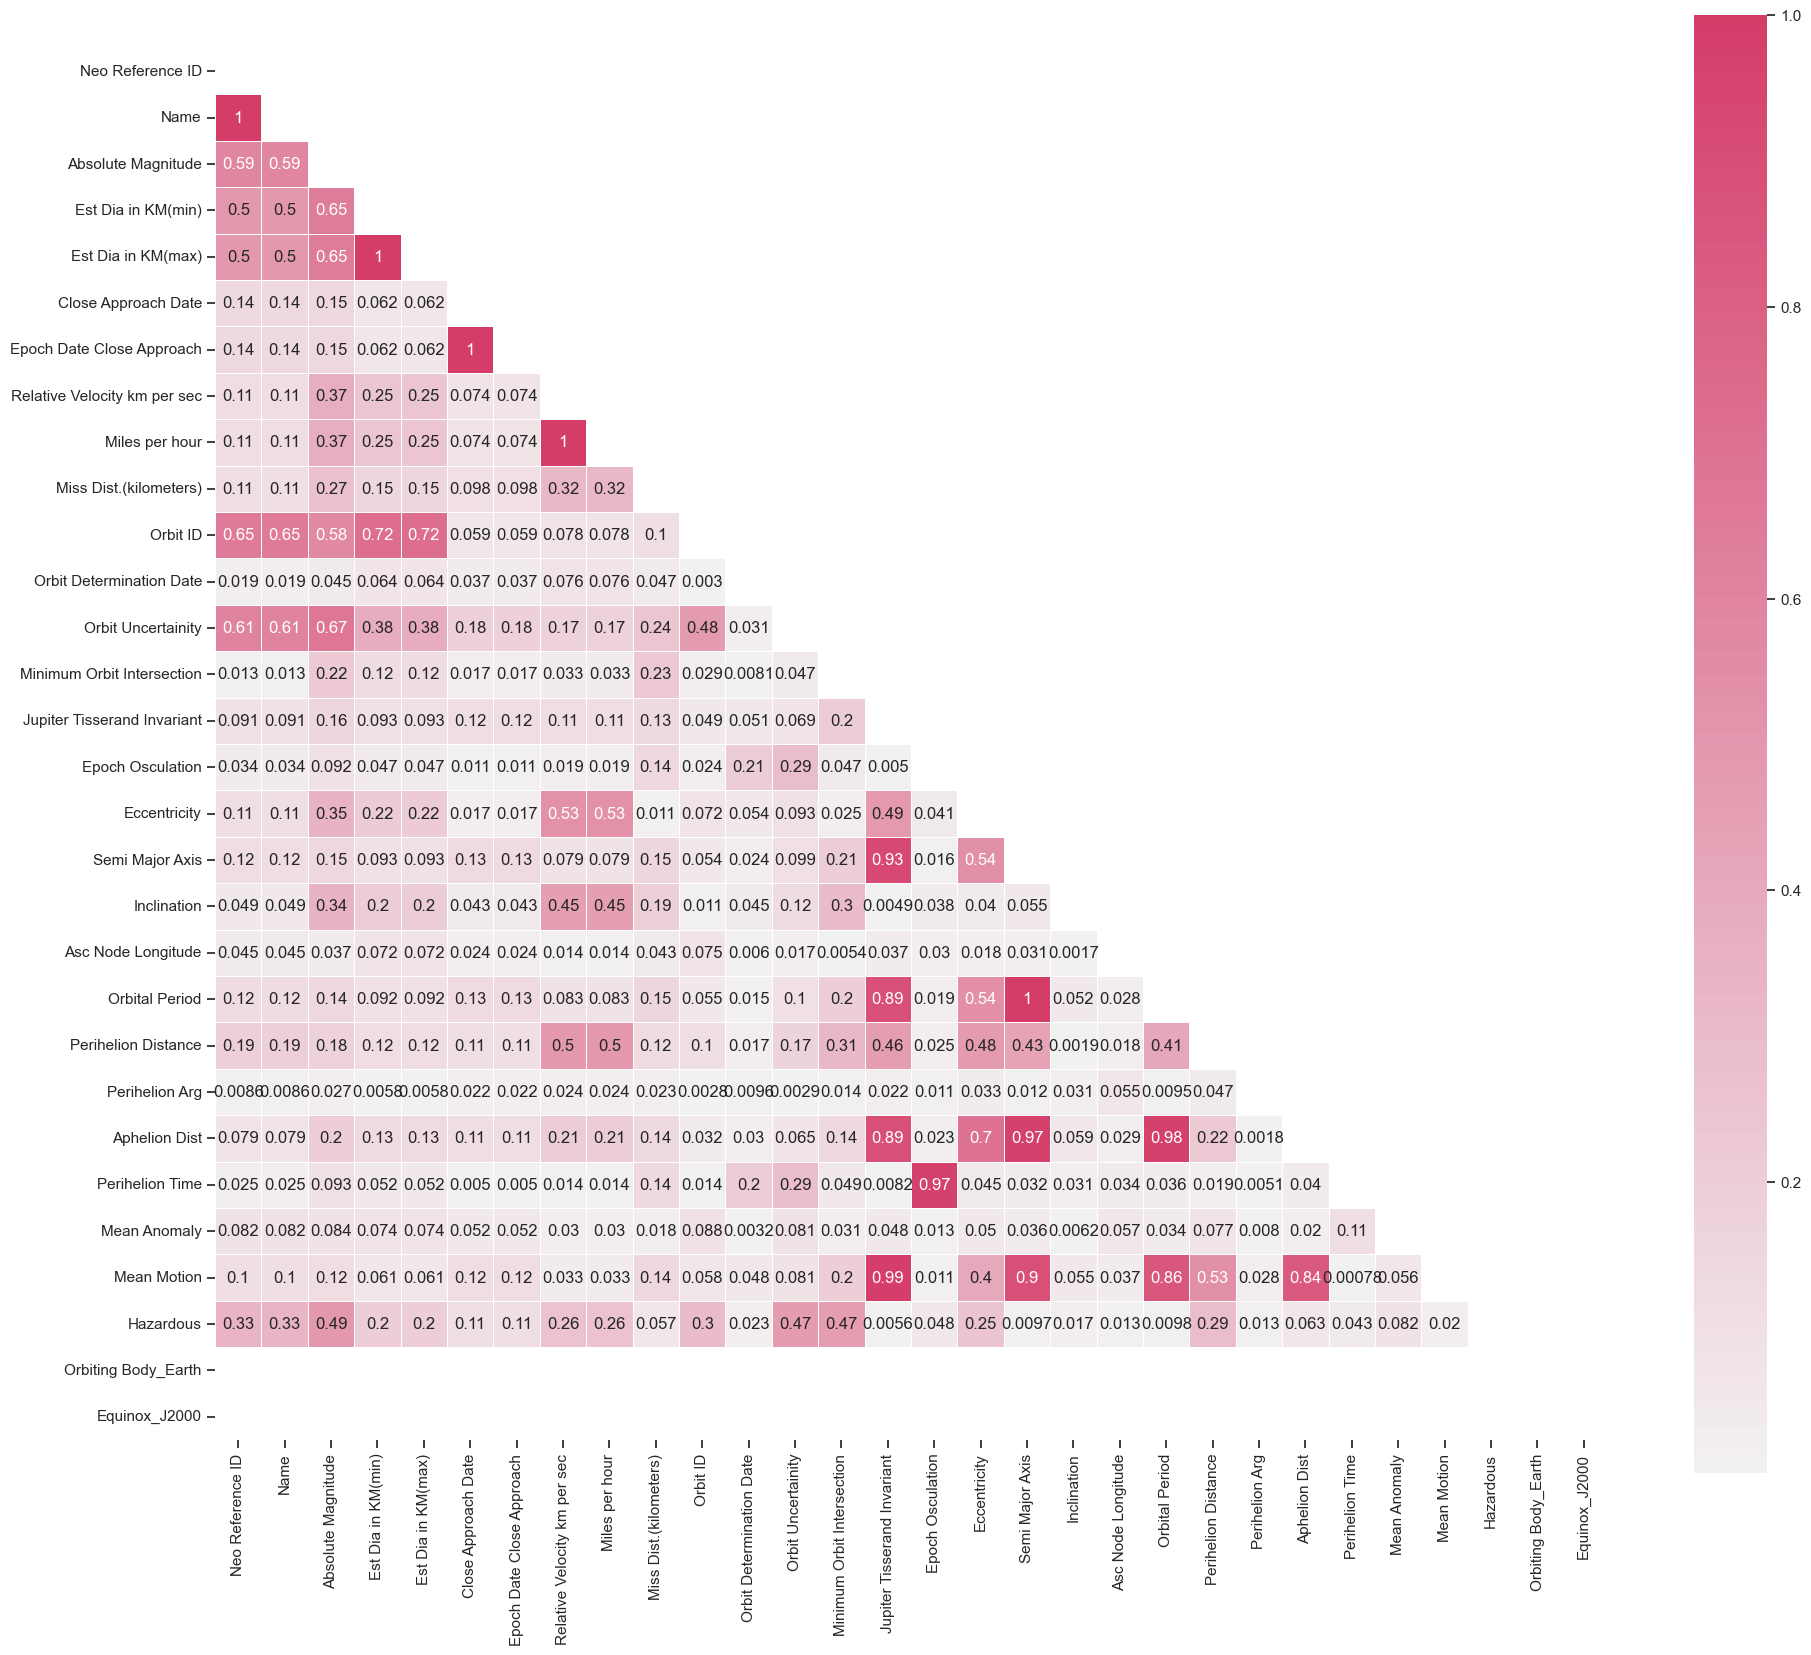

In [15]:
# Correlation Detection
correlation_mat = df_dropped.corr().abs()

mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = True, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

# Print out almost perfect correlated features
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

In [16]:
# dropping one of the features from each correlation (correlation > 90%)
df_cleaned = df_dropped.drop(['Name', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 
                                            'Miles per hour', 'Semi Major Axis', 'Orbital Period', 
                                            'Aphelion Dist', 'Perihelion Time', 'Mean Motion'], axis=1)

In [17]:
# 9 columns dropped
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Absolute Magnitude            7864 non-null   float64
 2   Est Dia in KM(min)            7864 non-null   float64
 3   Close Approach Date           7864 non-null   int64  
 4   Relative Velocity km per sec  7864 non-null   float64
 5   Miss Dist.(kilometers)        7864 non-null   float64
 6   Orbit ID                      7864 non-null   int64  
 7   Orbit Determination Date      7864 non-null   int64  
 8   Orbit Uncertainity            7864 non-null   int64  
 9   Minimum Orbit Intersection    7864 non-null   float64
 10  Jupiter Tisserand Invariant   7864 non-null   float64
 11  Epoch Osculation              7864 non-null   float64
 12  Eccentricity                  7864 non-null   float64
 13  Inc

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Absolute Magnitude            7864 non-null   float64
 2   Est Dia in KM(min)            7864 non-null   float64
 3   Close Approach Date           7864 non-null   int64  
 4   Relative Velocity km per sec  7864 non-null   float64
 5   Miss Dist.(kilometers)        7864 non-null   float64
 6   Orbit ID                      7864 non-null   int64  
 7   Orbit Determination Date      7864 non-null   int64  
 8   Orbit Uncertainity            7864 non-null   int64  
 9   Minimum Orbit Intersection    7864 non-null   float64
 10  Jupiter Tisserand Invariant   7864 non-null   float64
 11  Epoch Osculation              7864 non-null   float64
 12  Eccentricity                  7864 non-null   float64
 13  Inc

### Normalization (modifying ranges of all features to be similar)

#### Re-positioning 'Hazardous' 

In [19]:
# Get the 'Hazardous' column
hazardous_col = df_cleaned.iloc[:, 18]

# Remove the 'Hazardous' column from its original position
df_cleaned = df_cleaned.drop(columns=['Hazardous'])

# Add the 'Hazardous' column at the last position
df_cleaned['Hazardous'] = hazardous_col

In [20]:
# Drop the label 'Hazardous' first
features = df_cleaned.drop(['Hazardous'], axis = 1)
print(features.shape)

(7864, 20)


In [21]:
# Normalization
scaler = StandardScaler()
df_normalized = scaler.fit_transform(features)

In [22]:
# Convert the ndarray to a DataFrame
df_normalized = pd.DataFrame(df_normalized)

# Save the DataFrame as a CSV file
df_normalized.to_csv('Nasa_mod.csv', index=False)

In [23]:
df_cleaned.to_csv('Nasa_clea.csv', index=False)
df_cleaned.head()

Neo Reference ID  Absolute Magnitude  Est Dia in KM(min)  \
0       3723955             21.3              0.146068        
1       3092506             27.4              0.008801        
2       3671135             19.6              0.319562        
3       2495323             19.6              0.319562        
4       2153315             19.2              0.384198        

   Close Approach Date  Relative Velocity km per sec  Miss Dist.(kilometers)  \
0       788918400                 18.113985                 57298148.0         
1       790128000                 11.173874                 42683616.0         
2       790128000                 10.808844                 58759768.0         
3       790128000                 10.808842                 58759532.0         
4       790732800                 24.421884                 19324928.0         

   Orbit ID  Orbit Determination Date  Orbit Uncertainity  \
0     21            1491467569                  3           
1      7            1491470149                  6           
2     40            1496557012                  1           
3     43            1498630765                  1           
4     22            1491470825                  0           

   Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  \
0           0.186935                      5.457                 2458000.5      
1           0.005512                      5.093                 2458000.5      
2           0.272213                      4.724                 2458000.5      
3           0.272213                      4.724                 2458000.5      
4           0.098758                      4.921                 2458000.5      

   Eccentricity  Inclination  Asc Node Longitude  Perihelion Distance  \
0    0.351674     28.412996       136.717242           0.718200         
1    0.216578      7.905894        57.173266           0.983902         
2    0.563441     17.927751       178.971951           0.577800         
3    0.563441     17.927748       178.971953           0.577800         
4    0.449763     34.695127       112.562984           0.680905         

   Perihelion Arg  Mean Anomaly  Orbiting Body_Earth  Equinox_J2000  Hazardous  
0    313.091975     173.741112           1.0               1.0           0      
1     18.707701      68.741007           1.0               1.0           0      
2    198.145969     354.237368           1.0               1.0           0      
3    198.145960     354.237396           1.0               1.0           0      
4    288.374651     186.776932           1.0               1.0           0

In [24]:
# contains no label
df_normalized.head()

0         1         2         3         4         5         6      \
0  0.969155 -0.032101 -0.301490 -1.874050  0.353462  0.824256 -0.369872   
1 -0.069559  2.291898 -0.685388 -1.868023 -0.541365  0.153464 -0.684209   
2  0.882268 -0.679773  0.183727 -1.868023 -0.588430  0.891343  0.056728   
3 -1.051906 -0.679773  0.183727 -1.868023 -0.588431  0.891332  0.124086   
4 -1.614499 -0.832166  0.364497 -1.865009  1.166775 -0.918674 -0.347419   

      7         8         9         10        11        12        13     \
0 -0.140427  0.143032  1.690993  0.318795  0.282848 -0.342843  1.299270   
1 -0.140048  1.167755 -0.694170  0.033074  0.282848 -1.068858 -0.490203   
2  0.607413 -0.540116  2.812140 -0.256571  0.282848  0.795206  0.384316   
3  0.912130 -0.540116  2.812140 -0.256571  0.282848  0.795206  0.384315   
4 -0.139949 -0.881691  0.531736 -0.101937  0.282848  0.184291  1.847457   

      14        15        16        17     18   19   
0 -0.352869 -0.194988  1.285858 -0.127554  0.0  0.0  
1 -1.132371  0.916046 -1.618769 -1.119068  0.0  0.0  
2  0.061212 -0.782071  0.151710  1.576869  0.0  0.0  
3  0.061212 -0.782071  0.151710  1.576869  0.0  0.0  
4 -0.589572 -0.350938  1.041977 -0.004457  0.0  0.0

In [25]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7864 non-null   float64
 1   1       7864 non-null   float64
 2   2       7864 non-null   float64
 3   3       7864 non-null   float64
 4   4       7864 non-null   float64
 5   5       7864 non-null   float64
 6   6       7864 non-null   float64
 7   7       7864 non-null   float64
 8   8       7864 non-null   float64
 9   9       7864 non-null   float64
 10  10      7864 non-null   float64
 11  11      7864 non-null   float64
 12  12      7864 non-null   float64
 13  13      7864 non-null   float64
 14  14      7864 non-null   float64
 15  15      7864 non-null   float64
 16  16      7864 non-null   float64
 17  17      7864 non-null   float64
 18  18      7864 non-null   float64
 19  19      7864 non-null   float64
dtypes: float64(20)
memory usage: 1.2 MB


# Train-Test-Split

In [26]:
# Store all the features except the target variable
#features = df_cleaned.drop('Hazardous', axis=1)

#target = df_cleaned['Hazardous']

# Split the data into training and testing datasets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train, validation, test datasets

In [27]:
train, valid, test = np.split(df_cleaned.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [28]:
def scale_dataset(dataframe, oversample=False):
    if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values
        y = dataframe.iloc[:, -1].values
    elif isinstance(dataframe, np.ndarray):
        X = dataframe[:, :-1]
        y = dataframe[:, -1]
    else:
        raise ValueError("Unsupported data type. Expected pandas DataFrame or NumPy array.")

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [30]:
from imblearn.over_sampling import RandomOverSampler
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN 

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

y_valid_pred = knn_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       474
           1       0.92      0.87      0.90       463

    accuracy                           0.90       937
   macro avg       0.90      0.90      0.90       937
weighted avg       0.90      0.90      0.90       937



# KMeans

In [32]:
from collections import Counter
from colorama import Fore
from colorama import Back
# Modeling with K_Means
# Initialize an instance of KMeans with the optimal hyperparameter found earlier
k_means = KMeans(n_clusters=2).fit(df_normalized)

# Predict and store the clusters predicted for each data point(asteroid)
predictions = k_means.predict(df_normalized)

# Store the cluster labels
centroids = k_means.cluster_centers_

count = Counter(predictions)
for label, records in count.items():
    print(Fore.YELLOW + Back.BLACK + "Class: %d, Count= %d"%(label, records))

Class: 0, Count= 4065
Class: 1, Count= 3799


In [33]:
# Count the occurrences of each value in the 'Hazardous' column
count = Counter(df_cleaned['Hazardous'])

# Print the counts
print("Count of 0s:", count[0])
print("Count of 1s:", count[1])

Count of 0s: 3932
Count of 1s: 3932


# Neural Net

In [34]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(20,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

16 nodes, dropout 0, lr 0.01, batch size 32
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.1333 
16 nodes, dropout 0, lr 0.01, batch size 64
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9828 - loss: 0.0666 
16 nodes, dropout 0, lr 0.01, batch size 128
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9791 - loss: 0.0691 
16 nodes, dropout 0, lr 0.005, batch size 32
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.1016 
16 nodes, dropout 0, lr 0.005, batch size 64
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9837 - loss: 0.0688 
16 nodes, dropout 0, lr 0.005, batch size 128
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9898 - loss: 0.0551
16 nodes, dropout 0, lr 0.001, batch size 32
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9817 - loss: 0.0754 
16 nodes, dropout 0, lr 0.001, batch size 64
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9670 - loss: 0.0795
16 nodes, dropout 0, lr 0.001, batch size 128
3

In [36]:
#least_val_loss = float('inf')
#least_loss_model = None
#epochs=100
#for num_nodes in [32]:
#  for dropout_prob in[0.2]:
#    for lr in [0.005]:
#      for batch_size in [64]:
#        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
#        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
#        val_loss = model.evaluate(X_valid, y_valid)[0]
#        if val_loss < least_val_loss:
#          least_val_loss = val_loss
#          least_loss_model = model

In [37]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred, digits=4))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9882    0.9877    0.9880      2039
           1     0.9880    0.9884    0.9882      2076

    accuracy                         0.9881      4115
   macro avg     0.9881    0.9881    0.9881      4115
weighted avg     0.9881    0.9881    0.9881      4115



# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2039
           1       0.94      0.90      0.92      2076

    accuracy                           0.92      4115
   macro avg       0.92      0.92      0.92      4115
weighted avg       0.92      0.92      0.92      4115



# Log Regression 

In [39]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2039
           1       0.92      0.97      0.94      2076

    accuracy                           0.94      4115
   macro avg       0.94      0.94      0.94      4115
weighted avg       0.94      0.94      0.94      4115



# SVM

In [40]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2039
           1       0.93      0.98      0.95      2076

    accuracy                           0.95      4115
   macro avg       0.95      0.95      0.95      4115
weighted avg       0.95      0.95      0.95      4115



## Saving NN model 

In [43]:
# Save the entire model
model.save('nn_model.h5')